In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
from scipy.linalg import null_space

def qr_decomposition(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j].copy()
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], v)
            v = v - np.dot(Q[:, i], v) * Q[:, i]
        norm_v = np.linalg.norm(v)
        if norm_v > 1e-10:  # Use a tolerance to prevent division by very small numbers
            Q[:, j] = v / norm_v
            R[j, j] = norm_v
        else:
            Q[:, j] = 0  # Handling the case when the norm is too small
            R[j, j] = 0  # This will avoid creating NaNs in matrix Q

    return Q, R

#I've tried so many different algorithms just to find eigenvectors of a matrix without using a
#built in function, which is null_space function, but in each of this algorithms I eventually received an
#error message I dont know what it does stem from exactly but I think it was because of some numerical
#representational error. I HAD TO use built in function because I could not fix the issue :((
"""def gaussian_elimination_rref(A):
    m, n = A.shape
    A = A.copy().astype(float)
    pivot_cols = []  # Track pivot columns
    pivot_row = 0
    for col in range(n):
        if pivot_row >= m:
            break
        
        # Find the pivot in the current column segment
        max_row = np.argmax(np.abs(A[pivot_row:m, col])) + pivot_row
        if np.abs(A[max_row, col]) < 1e-10:  # Use a tolerance to skip effectively zero values
            continue
        
        # Swap rows to place the pivot at the current working row
        A[[pivot_row, max_row]] = A[[max_row, pivot_row]]
        
        # Normalize the pivot row
        A[pivot_row] /= A[pivot_row, col]
        
        # Eliminate all elements below the pivot
        for r in range(pivot_row + 1, m):
            A[r] -= A[pivot_row] * A[r, col]
            
        # Record the pivot column correctly
        pivot_cols.append(col)
        pivot_row += 1
            
    # Now eliminate above each pivot to create the reduced row echelon form
    for i in range(len(pivot_cols) - 1, -1, -1):
        col = pivot_cols[i]
        for r in range(i):
            A[r] -= A[r, col] * A[i]  # Corrected row subtraction
    
    return A, pivot_cols


def find_null_space(A, tol=1e-5):
    Compute the null space of A using Gaussian elimination to RREF
    m, n = A.shape
    rref, pivot_cols = gaussian_elimination_rref(A)

    # Identify free variables
    free_vars = [col for col in range(n) if col not in pivot_cols]
    null_space = np.zeros((n, len(free_vars)))

    if not free_vars:
        return null_space  # Return empty if no free variables

    # Construct null space basis
    for idx, free_col in enumerate(free_vars):
        null_space[free_col, idx] = 1
        for i in range(len(pivot_cols)):
            if pivot_cols[i] > free_col:
                break
            null_space[pivot_cols[i], idx] = -rref[i, free_col]

    return null_space"""


def qr_algorithm(A, iterations=999 , tol=1e-5):
    """Compute the eigenvalues of matrix A using the QR algorithm."""
    n = A.shape[0]
    S = np.copy(A)
    Q, R = np.eye(n), np.eye(n)
    
    # Iterative process
    for i in range(iterations):  # Limit iterations to prevent infinite loops
        Q, R = qr_decomposition(S)
        S = np.dot(R, Q)
        if i % 10 == 0:  # Check every 10 iterations
            if np.linalg.norm(S - np.dot(R, Q)) < tol:
                break

    eigenvalues = np.diag(S)
    return eigenvalues


def eigenvectors_from_eigenvalues(A, eigenvalues, tol=1e-9):
    n = A.shape[0]
    eigenvectors = []
    for lam in eigenvalues:
        null_matrix = A - lam * np.eye(n)
        # Use scipy's null_space method for more robust calculation
        null_vects = null_space(null_matrix)
        # Normalize and add the vectors
        for vect in null_vects.T:
            if np.linalg.norm(vect) > tol:
                eigenvectors.append(vect / np.linalg.norm(vect))
    return np.array(eigenvectors)


def svd(A):
    m, n = A.shape
    # Compute A^T A
    ATA = np.dot(A.T, A)
    
    # Compute eigenvalues and eigenvectors of A^T A using QR method
    eigenvalues = qr_algorithm(ATA)
    V = eigenvectors_from_eigenvalues(ATA, eigenvalues)
    
    # Compute the singular values"
    singular_values = np.sqrt(np.maximum(eigenvalues, 0))
    
    # Sort singular values and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(-singular_values)
    singular_values = singular_values[sorted_indices]
    V = V[:, sorted_indices]
    
    # Initialize U and Sigma
    U = np.zeros((m, m))
    Sigma = np.zeros((m, n))

    # Calculate columns of U by A * v_i / sigma_i
    for i in range(min(m, n)):
        if abs(singular_values[i]) > 1e-4:
            U[:, i] = np.dot(A, V.T[:, i]) / singular_values[i]
    
    # Fill in Sigma
    np.fill_diagonal(Sigma, singular_values)

    # Orthonormalize U to ensure orthogonality
    U, _ = np.linalg.qr(U)

    return U, Sigma, V.T


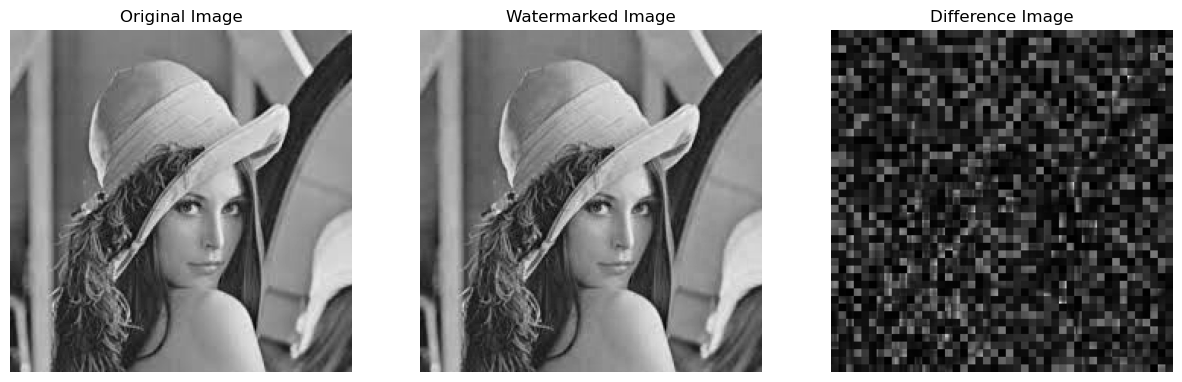

Original Watermark Bits: [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
Extracted Watermark Bits: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]


'# Assume \'image\' is the original image and \'watermarked_image\' is the output from the watermark embedding\noriginal = image\nwatermarked = watermarked_image\n\npsnr_value = psnr(original, watermarked)\nprint(f"PSNR: {psnr_value} dB")'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd

def convert_to_grayscale(image):
    """Convert a 3-channel RGB image to a single-channel grayscale image."""
    if image.ndim == 3 and image.shape[2] == 3:  # Check for RGB color image
        return np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])  # Convert to grayscale
    return image  # Return as is if already grayscale

def load_and_preprocess_image(image_path):
    """Load an image and preprocess it by converting to grayscale and normalizing."""
    image = plt.imread(image_path)
    
    # Convert to grayscale if necessary
    image = convert_to_grayscale(image)
    
    # Normalize if the pixel values range from 0 to 255
    if image.max() > 1:
        image = image / 255.0
    
    return image

def partition_image(image, block_size):
    """Partition the image into non-overlapping blocks of given size."""
    m, n = image.shape
    if m % block_size != 0 or n % block_size != 0:
        raise ValueError(f"Image dimensions ({m}x{n}) are not divisible by block_size {block_size}")
    return (image.reshape(m//block_size, block_size, n//block_size, block_size)
            .swapaxes(1, 2)
            .reshape(-1, block_size, block_size))

def rebuild_image(blocks, image_shape, block_size):
    """Rebuild the full image from blocks."""
    m, n = image_shape
    return (blocks.reshape(m//block_size, n//block_size, block_size, block_size)
            .swapaxes(1, 2)
            .reshape(m, n))

def embed_watermark(image, watermark_bits, block_size, Q):
    blocks = partition_image(image, block_size)
    num_blocks = len(blocks)
    watermarked_blocks = []

    for i in range(num_blocks):
        block = blocks[i]
        U, S, Vt = np.linalg.svd(block, full_matrices=False)
        original_D = S[0]
        Z = original_D % Q
        watermark_bit = watermark_bits[i % len(watermark_bits)]
        if watermark_bit == 0:
            if Z <= 3*Q/4:
                D_new = original_D + Q/4 - Z
            else:
                D_new = original_D - Z
        else:
            if Z < Q/4:
                D_new = original_D - Q/4 + Z
            else:
                D_new = original_D + Q/4 - Z
        S[0] = D_new
        watermarked_blocks.append(U @ np.diag(S) @ Vt)

    return rebuild_image(np.array(watermarked_blocks), image.shape, block_size)

def extract_watermark(image, block_size, Q):
    blocks = partition_image(image, block_size)
    watermark_bits = []

    for i, block in enumerate(blocks):
        U, S, Vt = np.linalg.svd(block, full_matrices=False)
        D = S[0]
        Z = D % Q
        watermark_bit = 0 if Z < Q/2 else 1
        watermark_bits.append(watermark_bit)

    return watermark_bits


# Load and preprocess the image
image_path = 'host_image.jpg'
image = plt.imread(image_path)

# Convert image to grayscale if it's in color
if image.ndim == 3:
    image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

# Normalize if necessary
if image.max() > 1:
    image = image / 255.0

# Define parameters for watermarking
block_size = 5
Q = 0.08
watermark_bits = [1, 0, 1, 0] * (image.size // 36)  # Adjust size based on block size

# Embed watermark
watermarked_image = embed_watermark(image, watermark_bits, block_size, Q)

# Extract watermark
extracted_bits = extract_watermark(watermarked_image, block_size, Q)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(watermarked_image, cmap='gray')
axes[1].set_title('Watermarked Image')
axes[1].axis('off')

# Compute the absolute difference to visualize the watermark
difference_image = np.abs(watermarked_image - image)
axes[2].imshow(difference_image, cmap='gray')
axes[2].set_title('Difference Image')
axes[2].axis('off')

plt.show()

# Print extracted watermark information
print("Original Watermark Bits:", watermark_bits[:32])  # Print first 32 bits for brevity
print("Extracted Watermark Bits:", extracted_bits[:32])  # Print first 32 bits for brevity


def mse(imageA, imageB):
    """Calculate the mean squared error between two images."""
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

def psnr(original, watermarked):
    """Calculate the PSNR between two images."""
    max_pixel = 1.0
    mse_value = mse(original, watermarked)
    if mse_value == 0:  # MSE is zero means no noise is present in the signal.
                        # Therefore PSNR has no meaning.
        return float('inf')
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

# Assume 'image' is the original image and 'watermarked_image' is the output from the watermark embedding
"""
original = image
watermarked = watermarked_image

psnr_value = psnr(original, watermarked)
print(f"PSNR: {psnr_value} dB")"""